# Multi-Class Classification and Model Tuning
**Objective:**

The goal of this project is to build, evaluate, and compare three multi-class classifiers: Logistic Regression, Support Vector Machine (SVM), and Multi-Layer Perceptron (MLP). I will also tune the hyperparameters of these models using Grid Search, perform 5-fold cross-validation, and visualize the performance using confusion matrices.


# Step 1: Data Exploration

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 34 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   Unnamed: 0                                                                  1009 non-null   int64  
 1   Adm_Year                                                                    1009 non-null   float64
 2   Gender                                                                      1009 non-null   object 
 3   Age                                                                         1009 non-null   float64
 4   HSC_Pass_Year                                                               1009 non-null   float64
 5   Program                                                                     1009 non-null   object 
 6   Merit_Scholarship                 

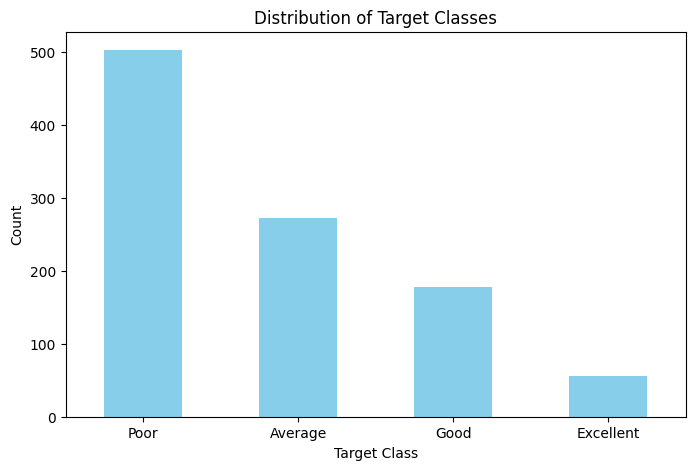

In [20]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("./data/performance.csv")

# Display dataset structure and summary
print("Dataset Info:")
print(data.info())
print("\nDataset Description:")
print(data.describe())
print("\nFirst Few Rows:")
print(data.head())

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# Distribution of the Target variable
print("\nTarget Variable Distribution:")
target_dist = data['Target'].value_counts()
print(target_dist)

# Visualize the Target variable distribution
plt.figure(figsize=(8, 5))
target_dist.plot(kind='bar', color='skyblue')
plt.title("Distribution of Target Classes")
plt.xlabel("Target Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


**Handling Missing Values**
- Since there are only 7 missing values for Interest_Area1 and 1 for Skills1 out of 1009 total rows, dropping these rows is unlikely to significantly affect your dataset.


In [26]:
# Drop rows with missing values in 'Interest_Area1' and 'Skills1'
data_cleaned = data.dropna(subset=['Interest_Area1', 'Skills1'])

# Check the shape of the cleaned dataset
print("Original Dataset Shape:", data.shape)
print("Cleaned Dataset Shape:", data_cleaned.shape)

# Verify no missing values remain in these columns
print("Missing Values After Cleaning:")
print(data_cleaned[['Interest_Area1', 'Skills1']].isnull().sum())


Original Dataset Shape: (1009, 34)
Cleaned Dataset Shape: (1001, 34)
Missing Values After Cleaning:
Interest_Area1    0
Skills1           0
dtype: int64


# Step 2: Data Preprocessing

**2.1 Encode the target variable using LabelEncoder**

In [27]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'Target' column
data_cleaned['Target'] = label_encoder.fit_transform(data_cleaned['Target'])


# Check the mapping of target labels
print("Encoded Target Mapping:")
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

# Display the first few rows of the encoded dataset
data_cleaned.head()


Encoded Target Mapping:
{'Average': 0, 'Excellent': 1, 'Good': 2, 'Poor': 3}


C:\Users\Darling\AppData\Local\Temp\ipykernel_19772\3925800011.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Target'] = label_encoder.fit_transform(data_cleaned['Target'])


,Unnamed: 0,Adm_Year,Gender,Age,HSC_Pass_Year,Program,Merit_Scholarship,Uni_Transport,Learn_Mode,Smartphone,...,SM_Hours1,Avg_Attendance1,Skills1,Skill_Dev_Hours1,Interest_Area1,Prev_SGPA1,Curr_CGPA1,Completed_Credits1,Diploma,Family_Income1
0,7,2021.0,Female,22.0,2019.0,BCSE,Yes,No,Offline,Yes,...,2.0,100.0,Web development skill(Frontend),1.0,Networking,3.80,3.64,35.0,False,32500.0
1,11,2021.0,Male,22.0,2019.0,BCSE,No,No,Offline,Yes,...,2.0,90.0,Programming,1.0,Data Science,3.40,3.53,35.0,False,20000.0
2,15,2021.0,Male,20.0,2020.0,BCSE,Yes,Yes,Offline,Yes,...,1.0,95.0,Programming,3.0,Machine Learning / Deep Learning,3.93,3.89,35.0,False,30000.0
3,18,2021.0,Male,21.0,2020.0,BCSE,Yes,No,Online,Yes,...,3.0,95.0,Programming,1.0,Artificial Intelligence,3.10,3.50,35.0,False,25000.0
4,20,2021.0,Female,21.0,2019.0,BCSE,Yes,No,Offline,Yes,...,2.0,96.0,Web development skill(Frontend),1.0,Web Development,3.81,3.65,34.0,False,30000.0


**2.2 Standardize the numerical features using StandardScaler**

In [28]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns to standardize
numerical_columns = [
    'Age', 'HSC_Pass_Year', 'Curr_Sem1', 'Study_Hours1', 
    'Study_Sessions1', 'SM_Hours1', 'Avg_Attendance1', 
    'Skill_Dev_Hours1', 'Prev_SGPA1', 'Curr_CGPA1', 
    'Completed_Credits1', 'Family_Income1'
]

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling to the numerical columns
data_cleaned[numerical_columns] = scaler.fit_transform(data_cleaned[numerical_columns])

# Verify the standardized values
print("First few rows after standardization:")
print(data_cleaned[numerical_columns].head())


First few rows after standardization:
        Age  HSC_Pass_Year  Curr_Sem1  Study_Hours1  Study_Sessions1  \
0  0.390984       -0.18248  -0.146686     -0.637690        -0.065140   
1  0.390984       -0.18248  -0.146686      0.076521        -0.065140   
2 -0.848722        0.56005  -0.146686     -0.637690        -1.031143   
3 -0.228869        0.56005  -0.146686     -1.113831        -0.065140   
4 -0.228869       -0.18248  -0.146686     -0.161549        -0.065140   

   SM_Hours1  Avg_Attendance1  Skill_Dev_Hours1  Prev_SGPA1  Curr_CGPA1  \
0  -0.592087         0.739960         -0.832339    1.211677    0.586675   
1  -0.592087         0.118515         -0.832339    0.746090    0.436513   
2  -1.001325         0.429238          0.525723    1.362993    0.927951   
3  -0.182849         0.429238         -0.832339    0.396900    0.395560   
4  -0.592087         0.491382         -0.832339    1.223317    0.600326   

   Completed_Credits1  Family_Income1  
0           -0.874793       -0.387823 

C:\Users\Darling\AppData\Local\Temp\ipykernel_19772\2387507913.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[numerical_columns] = scaler.fit_transform(data_cleaned[numerical_columns])


**2.3 Splitting the dataset**

In [29]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = data_cleaned.drop(columns=["Target"])
y = data_cleaned["Target"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print shapes to verify
print("Training set shape (features):", X_train.shape)
print("Testing set shape (features):", X_test.shape)
print("Training set shape (target):", y_train.shape)
print("Testing set shape (target):", y_test.shape)


Training set shape (features): (700, 33)
Testing set shape (features): (301, 33)
Training set shape (target): (700,)
Testing set shape (target): (301,)


# Step 3: Model Training and First EvaluationStep 

**3.1 Train and Evaluate Logistic Regression Model**

In [ ]:
# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)

# Apply one-hot encoding to both training and testing sets
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Ensure the columns in X_test match those in X_train
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Proceed with the model training using the encoded data
logistic_model.fit(X_train_encoded, y_train)
y_pred_logistic = logistic_model.predict(X_test_encoded)

# Evaluate accuracy
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Accuracy:", logistic_accuracy)


Categorical Columns: Index(['Gender', 'Program', 'Merit_Scholarship', 'Uni_Transport', 'Learn_Mode',
       'Smartphone', 'PC', 'Eng_Proficiency', 'Probation', 'Suspension',
       'Do you attend in teacher consultancy for any kind of academical problems? ',
       'Relationship', 'CoCurricular', 'Living_Arrangement', 'Health_Issues',
       'Physical_Disabilities', 'Skills1', 'Interest_Area1'],
      dtype='object')
Logistic Regression Accuracy: 0.5382059800664452


c:\Users\Darling\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


c:\Users\Darling\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Darling\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Darling\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

     Average       0.00      0.00      0.00        67
   Excellent       0.00      0.00      0.00        16
        Good       0.36      0.31      0.33        59
        Poor       0.56      0.89      0.69       159

    accuracy                           0.53       301
   macro avg       0.23      0.30      0.25       301
weighted avg       0.37      0.53      0.43       301



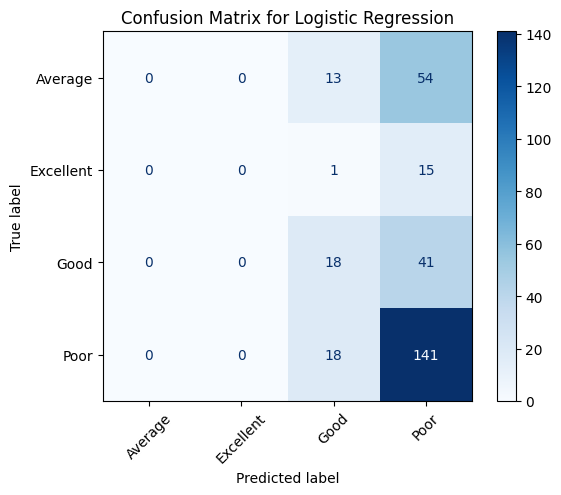

In [45]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Generate a classification report
logistic_classification_report = classification_report(y_test, y_pred_logistic, target_names=['Average', 'Excellent', 'Good', 'Poor'])
print("Classification Report for Logistic Regression:")
print(logistic_classification_report)


# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_logistic)

# Class names
class_names = ['Average', 'Excellent', 'Good', 'Poor']

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap='Blues', xticks_rotation=45)

# Customize plot
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


**Observations:**
**True Positives:**

- Poor: Predicted correctly most often with 143 instances.
- Good: Moderate accuracy with 18 correct predictions.
- Average and Excellent: Very few correct predictions.
- Misclassifications:

Many Average and Good instances were misclassified as Poor. The model struggles heavily with Excellent.

**3.2 Train and Evaluate Support Vector Machine (SVM)**

SVM Accuracy: 0.5282392026578073
Classification Report for SVM:
               precision    recall  f1-score   support

     Average       0.00      0.00      0.00        67
   Excellent       0.00      0.00      0.00        16
        Good       0.00      0.00      0.00        59
        Poor       0.53      1.00      0.69       159

    accuracy                           0.53       301
   macro avg       0.13      0.25      0.17       301
weighted avg       0.28      0.53      0.37       301



c:\Users\Darling\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Darling\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Darling\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

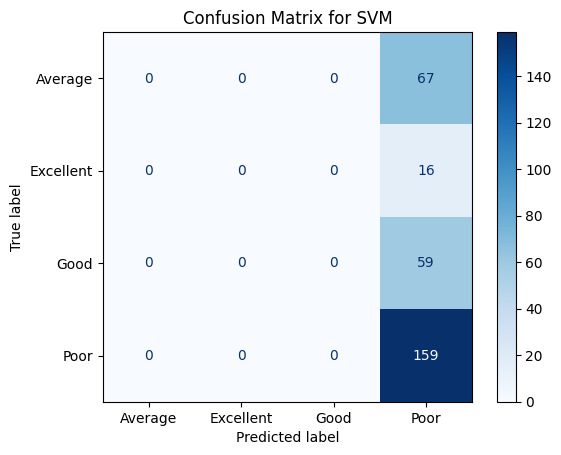

In [34]:
from sklearn.svm import SVC

# Initialize and train the SVM model
svm_model = SVC(kernel='rbf', random_state=0)
svm_model.fit(X_train_encoded, y_train)

# Make predictions with the SVM model
y_pred_svm = svm_model.predict(X_test_encoded)

# Evaluate accuracy
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", svm_accuracy)

# Generate classification report
from sklearn.metrics import classification_report
svm_classification_report = classification_report(y_test, y_pred_svm, target_names=['Average', 'Excellent', 'Good', 'Poor'])
print("Classification Report for SVM:\n", svm_classification_report)

# Plot confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm, display_labels=['Average', 'Excellent', 'Good', 'Poor'], cmap='Blues')
plt.title("Confusion Matrix for SVM")
plt.show()


**Observation:**

- The SVM model is struggling due to the imbalance in class distributions and potentially high overlap among features for different classes. This behavior suggests that either the hyperparameters of the SVM need tuning or the data preprocessing might need further balancing to address the class imbalance.

**3.3 Training and Evaluationg Multi-Layer Perceptron**

MLP Accuracy: 0.6777408637873754
Classification Report for MLP:
              precision    recall  f1-score   support

     Average       1.00      0.03      0.06        67
   Excellent       0.00      0.00      0.00        16
        Good       0.48      0.98      0.64        59
        Poor       0.82      0.91      0.86       159

    accuracy                           0.68       301
   macro avg       0.57      0.48      0.39       301
weighted avg       0.75      0.68      0.59       301



Text(0.5, 1.0, 'Confusion Matrix for MLP')

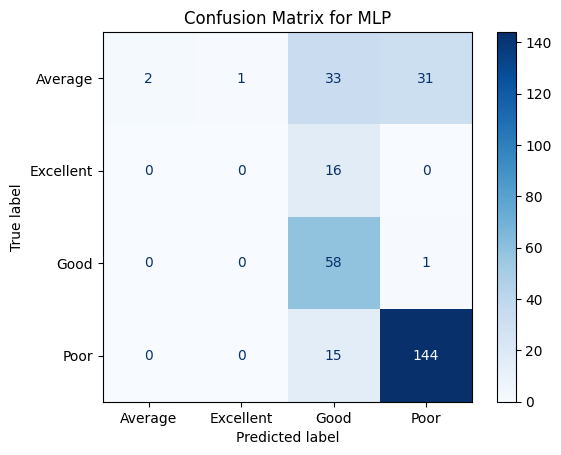

In [35]:
# Import necessary modules
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Train the MLP model
mlp_model = MLPClassifier(random_state=0)
mlp_model.fit(X_train_encoded, y_train)

# Make predictions on the testing set
y_pred_mlp = mlp_model.predict(X_test_encoded)

# Evaluate accuracy
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
print(f"MLP Accuracy: {mlp_accuracy}")

# Generate a classification report
mlp_classification_report = classification_report(
    y_test, y_pred_mlp, target_names=['Average', 'Excellent', 'Good', 'Poor']
)
print("Classification Report for MLP:")
print(mlp_classification_report)

# Generate and display the confusion matrix
mlp_confusion_matrix = confusion_matrix(y_test, y_pred_mlp)
disp = ConfusionMatrixDisplay(
    confusion_matrix=mlp_confusion_matrix,
    display_labels=['Average', 'Excellent', 'Good', 'Poor']
)
disp.plot(cmap="Blues")
disp.ax_.set_title("Confusion Matrix for MLP")


**Observation:**
- The MLP model shows the best promise among the three, but it still leaves room for improvement to address the challenges posed by underrepresented classes and misclassifications.

# Step 4: Hyperparameter Tuning

**4.1 Hyperparameter tuning using GridSearchCV for Logistic Regression, SVM, and MLP:**

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


# Define parameter grid for Logistic Regression
param_grid_lr = {'C': [0.01, 0.1, 1, 10, 20, 50, 100]}

# Logistic Regression model
logistic_model = LogisticRegression(solver='saga', random_state=0)

# GridSearchCV for Logistic Regression
grid_search_lr = GridSearchCV(estimator=logistic_model, param_grid=param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train_encoded, y_train)

# Best parameters for Logistic Regression
best_params_lr = grid_search_lr.best_params_

print("Logistic Regression Best Parameters:", best_params_lr)



# Define parameter grid for SVM
param_grid_svm = {'C': [0.01, 0.1, 1, 10, 20, 50, 100]}

# SVM model
svm_model = SVC(kernel='rbf', random_state=0)

# GridSearchCV for SVM
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train_encoded, y_train)

# Best parameters and accuracy for SVM
best_params_svm = grid_search_svm.best_params_

print("SVM Best Parameters:", best_params_svm)




c:\Users\Darling\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Darling\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Darling\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Darling\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Darling\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which 

Logistic Regression Best Parameters: {'C': 0.01}
SVM Best Parameters: {'C': 0.01}


In [43]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for MLP
mlp_param_grid = {
    'hidden_layer_sizes': [(128,), (64, 64), (128, 64), (128, 64, 32)],
}

# Initialize the MLPClassifier with a fixed random_state
mlp_model = MLPClassifier(random_state=0)

# Set up GridSearchCV
mlp_grid_search = GridSearchCV(estimator=mlp_model, param_grid=mlp_param_grid, cv=5, scoring='accuracy')

# Perform the grid search on the training data
mlp_grid_search.fit(X_train_encoded, y_train)

# Retrieve the best parameters
mlp_best_params = mlp_grid_search.best_params_

# Print results
print("MLP Best Parameters:", mlp_best_params)



MLP Best Parameters: {'hidden_layer_sizes': (128,)}


# Step 5: Model Retraining and Second Evaluation

c:\Users\Darling\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Darling\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Darling\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Darling\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\met

Logistic Regression Results:
Accuracy: 0.5282392026578073
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

     Average       0.00      0.00      0.00        67
   Excellent       0.00      0.00      0.00        16
        Good       0.36      0.31      0.33        59
        Poor       0.56      0.89      0.69       159

    accuracy                           0.53       301
   macro avg       0.23      0.30      0.25       301
weighted avg       0.37      0.53      0.43       301



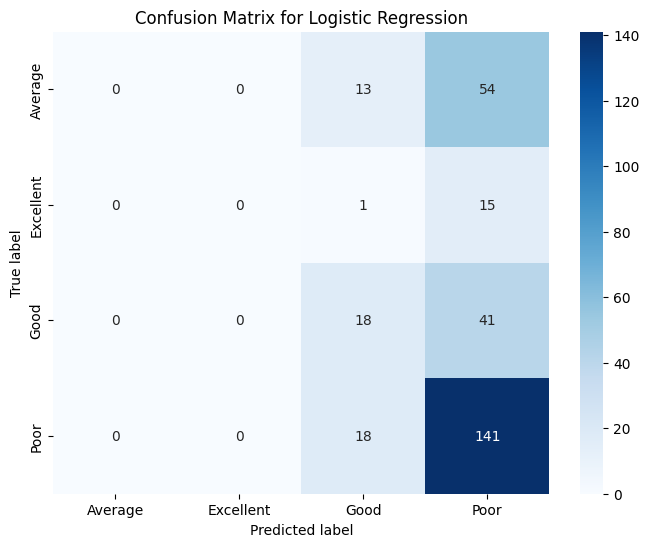


SVM Results:
Accuracy: 0.5282392026578073
Classification Report for SVM:
              precision    recall  f1-score   support

     Average       0.00      0.00      0.00        67
   Excellent       0.00      0.00      0.00        16
        Good       0.00      0.00      0.00        59
        Poor       0.53      1.00      0.69       159

    accuracy                           0.53       301
   macro avg       0.13      0.25      0.17       301
weighted avg       0.28      0.53      0.37       301



c:\Users\Darling\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Darling\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Darling\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

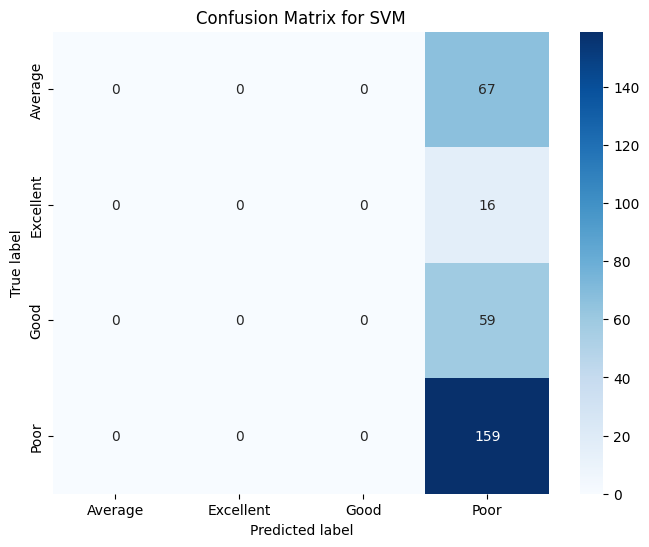


MLP Results:
Accuracy: 0.6312292358803987
Classification Report for MLP:
              precision    recall  f1-score   support

     Average       0.27      0.21      0.24        67
   Excellent       0.00      0.00      0.00        16
        Good       0.56      0.37      0.45        59
        Poor       0.73      0.97      0.83       159

    accuracy                           0.63       301
   macro avg       0.39      0.39      0.38       301
weighted avg       0.56      0.63      0.58       301



c:\Users\Darling\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Darling\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Darling\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

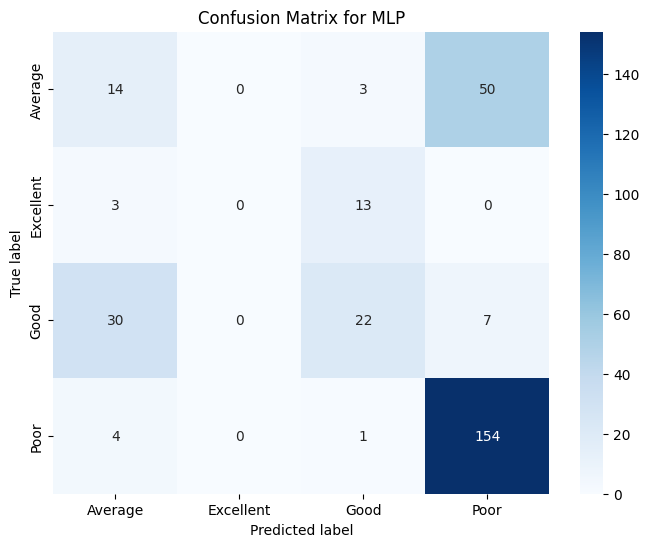

In [44]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Logistic Regression retraining
logistic_model = LogisticRegression(solver='saga', C=0.01, random_state=0)
logistic_model.fit(X_train_encoded, y_train)
y_pred_logistic = logistic_model.predict(X_test_encoded)

print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_logistic, target_names=['Average', 'Excellent', 'Good', 'Poor']))

# Confusion matrix for Logistic Regression
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='Blues', xticklabels=['Average', 'Excellent', 'Good', 'Poor'], yticklabels=['Average', 'Excellent', 'Good', 'Poor'])
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

# SVM retraining
svm_model = SVC(kernel='rbf', C=0.01, random_state=0)
svm_model.fit(X_train_encoded, y_train)
y_pred_svm = svm_model.predict(X_test_encoded)

print("\nSVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report for SVM:")
print(classification_report(y_test, y_pred_svm, target_names=['Average', 'Excellent', 'Good', 'Poor']))

# Confusion matrix for SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Average', 'Excellent', 'Good', 'Poor'], yticklabels=['Average', 'Excellent', 'Good', 'Poor'])
plt.title("Confusion Matrix for SVM")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

# MLP retraining
mlp_model = MLPClassifier(hidden_layer_sizes=(128,), random_state=0)
mlp_model.fit(X_train_encoded, y_train)
y_pred_mlp = mlp_model.predict(X_test_encoded)

print("\nMLP Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("Classification Report for MLP:")
print(classification_report(y_test, y_pred_mlp, target_names=['Average', 'Excellent', 'Good', 'Poor']))

# Confusion matrix for MLP
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Blues', xticklabels=['Average', 'Excellent', 'Good', 'Poor'], yticklabels=['Average', 'Excellent', 'Good', 'Poor'])
plt.title("Confusion Matrix for MLP")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()


# Step 6: Analysis and Discussion

1. # Performance Comparison:

    **Before Hyperparameter Tuning:**

    Logistic Regression:
    Accuracy: 53%
    Strengths: Reasonable performance for "Poor" class (high recall).
    Weaknesses: Almost no recall for other classes, particularly "Excellent" and "Average."
    Misclassifications: "Good" and "Average" often misclassified as "Poor."

    SVM:
    Accuracy: 53%
    Strengths: High recall for "Poor."
    Weaknesses: Overly biased toward predicting "Poor" (all other classes scored 0 for recall and precision).
    Misclassifications: All instances of "Excellent," "Good," and "Average" misclassified as "Poor."

    MLP:
    Accuracy: 68%
    Strengths: Significant improvement over Logistic Regression and SVM. Better performance in distinguishing "Good" and "Average."
    Weaknesses: Zero recall for "Excellent," but better recall for "Good" and "Poor."
    Misclassifications: Primarily errors in "Excellent," "Average," and some confusion between "Good" and "Poor."

    **After Hyperparameter Tuning:**

    Logistic Regression:
    Accuracy remained at 53%.
    Minimal improvement. The same biases and misclassification issues persisted.

    SVM:
    Accuracy remained at 53%.
    No change in class balance, still entirely biased toward "Poor."

    MLP:
    Accuracy dropped slightly to 63%.
    Misclassifications for "Good" and "Poor" improved slightly, but overall performance was similar to the untuned model.

2. # Target Class with the Most Misclassifications:

    "Excellent":
    Across all models, "Excellent" was consistently the most misclassified class, often with zero recall and precision.
    This issue is likely due to the class imbalance in the dataset—only 16 instances of "Excellent" compared to 159 for "Poor." Models struggled to recognize the rare patterns for "Excellent."

    "Average":
    Second-most misclassified class. Likely due to overlapping feature distributions with other classes like "Poor."

3. # What Might Be Causing These Issues?

    Class Imbalance:
    - The dataset has a significant skew, with the "Poor" class dominating. Models tend to favor the majority class, neglecting the minority classes.

    Feature Overlap:
    - Certain features may not provide clear separability between classes. For instance, "Good" and "Average" may have similar features, leading to confusion.
    
    Insufficient Model Complexity:
    - Logistic Regression and SVM might lack the flexibility to capture the nuanced relationships between features and target classes. MLP performs better but still struggles due to imbalanced data and overlapping feature spaces.

4. # FINAL THOUGHTS:

    Best Model: MLP is the best performing model but still needs improvement, especially for minority classes.

    Next Steps:
    - Address class imbalance using oversampling, undersampling, or class-weight adjustments.
    - Explore feature selection or engineering to better separate overlapping classes.
    - Consider more complex models or ensemble methods for further improvements.